# Notebook 3: Conditional Probability and Bayes' Theorem

## 1. Conditional Probability

### When Events Influence Each Other

In the real world, events often influence each other. For example:
- The probability of rain might depend on whether it's cloudy
- The probability of a customer buying a product might depend on whether they've visited your website before
- The probability of having a disease might depend on whether a medical test is positive

Conditional probability gives us a way to quantify these relationships.

### What is Conditional Probability?

**Conditional probability** is the probability of an event occurring given that another event has already occurred.

We write this as P(A|B), which reads "the probability of A given B."

### The Intuition: Restricting Our Sample Space

Think of conditional probability as restricting our sample space to only the outcomes where the conditioning event (B) occurs, then calculating the probability of our target event (A) within this new, smaller sample space.

Let's understand this with a simple example: colored marbles in a bag.

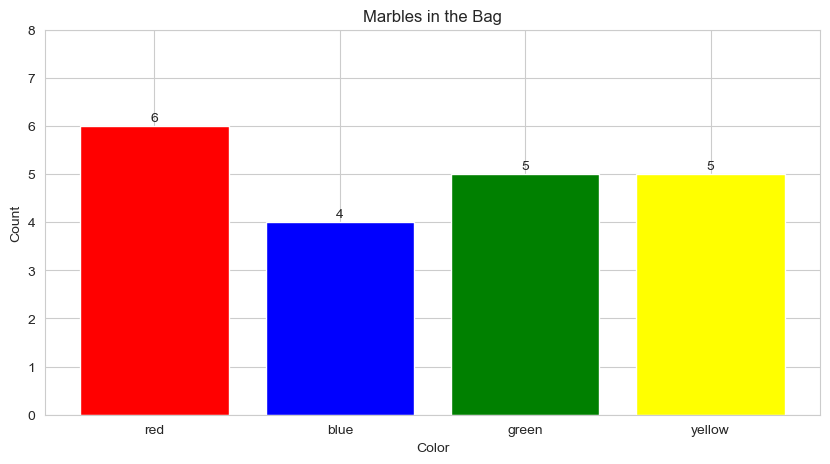

Unconditioned probabilities:
P(Red) = 0.300
P(Blue) = 0.200
P(Green) = 0.250
P(Yellow) = 0.250


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# Set plot style
sns.set_style('whitegrid')

# Define our bag of marbles
marbles = {
    'red': 6,
    'blue': 4,
    'green': 5,
    'yellow': 5
}

total_marbles = sum(marbles.values())

# Visualize the marbles in the bag
plt.figure(figsize=(10, 5))
plt.bar(marbles.keys(), marbles.values(), color=['red', 'blue', 'green', 'yellow'])
plt.title('Marbles in the Bag')
plt.xlabel('Color')
plt.ylabel('Count')
plt.ylim(0, 8)

# Add count labels on top of bars
for color, count in marbles.items():
    plt.text(color, count + 0.1, str(count), ha='center')

plt.show()

# Calculate unconditioned probabilities
p_red = marbles['red'] / total_marbles
p_blue = marbles['blue'] / total_marbles
p_green = marbles['green'] / total_marbles
p_yellow = marbles['yellow'] / total_marbles

print(f"Unconditioned probabilities:")
print(f"P(Red) = {p_red:.3f}")
print(f"P(Blue) = {p_blue:.3f}")
print(f"P(Green) = {p_green:.3f}")
print(f"P(Yellow) = {p_yellow:.3f}")



Now, let's consider conditional probability. What's the probability of drawing a red marble, given that we draw a primary color (red, blue, or yellow)?



In [2]:
# Define primary colors
primary_colors = ['red', 'blue', 'yellow']

# Count the primary colored marbles
primary_marbles = sum(marbles[color] for color in primary_colors)

# Calculate the conditional probability
p_red_given_primary = marbles['red'] / primary_marbles

print(f"\nConditional probability:")
print(f"P(Red | Primary Color) = {p_red_given_primary:.3f}")


Conditional probability:
P(Red | Primary Color) = 0.400


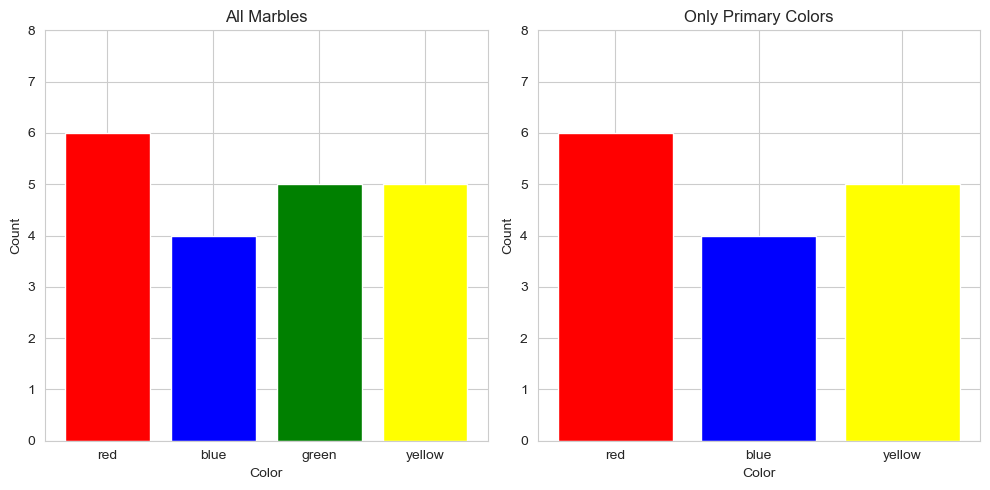

In [3]:
# Visualize this conditional probability
plt.figure(figsize=(10, 5))

# The full bag
plt.subplot(1, 2, 1)
plt.bar(marbles.keys(), marbles.values(), color=['red', 'blue', 'green', 'yellow'])
plt.title('All Marbles')
plt.xlabel('Color')
plt.ylabel('Count')
plt.ylim(0, 8)

# The restricted sample space (only primary colors)
plt.subplot(1, 2, 2)
primary_counts = [marbles[color] for color in primary_colors]
plt.bar(primary_colors, primary_counts, color=primary_colors)
plt.title('Only Primary Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.ylim(0, 8)

plt.tight_layout()
plt.show()


### The Conditional Probability Formula

Formally, the conditional probability of event A given event B is defined as:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Where:
- P(A|B) is the probability of A given B
- P(A ∩ B) is the probability of both A and B occurring (the intersection)
- P(B) is the probability of B occurring

Let's use this formula with our marbles example:



In [4]:
# Calculate P(Red ∩ Primary)
p_red_and_primary = marbles['red'] / total_marbles

# Calculate P(Primary)
p_primary = primary_marbles / total_marbles

# Calculate P(Red | Primary) using the formula
p_red_given_primary_formula = p_red_and_primary / p_primary

print(f"Calculating P(Red | Primary) using the formula:")
print(f"P(Red ∩ Primary) = {p_red_and_primary:.3f}")
print(f"P(Primary) = {p_primary:.3f}")
print(f"P(Red | Primary) = P(Red ∩ Primary) / P(Primary) = {p_red_and_primary:.3f} / {p_primary:.3f} = {p_red_given_primary_formula:.3f}")


Calculating P(Red | Primary) using the formula:
P(Red ∩ Primary) = 0.300
P(Primary) = 0.750
P(Red | Primary) = P(Red ∩ Primary) / P(Primary) = 0.300 / 0.750 = 0.400



### Conditional Probability with a Frequency Table

Conditional probability is often easiest to understand with a frequency or contingency table. Let's create a more complex example:



In [5]:
# Create a dataset of students categorized by study habits and exam results
np.random.seed(42)
n_students = 500

# Probabilities for simulation
p_studyHard = 0.6  # 60% of students study hard
p_pass_given_studyHard = 0.8  # 80% of hard-studying students pass
p_pass_given_notStudyHard = 0.3  # 30% of not-hard-studying students pass

# Generate data
study_hard = np.random.choice([True, False], size=n_students, p=[p_studyHard, 1-p_studyHard])
passed_exam = np.zeros(n_students, dtype=bool)

for i in range(n_students):
    if study_hard[i]:
        passed_exam[i] = np.random.choice([True, False], p=[p_pass_given_studyHard, 1-p_pass_given_studyHard])
    else:
        passed_exam[i] = np.random.choice([True, False], p=[p_pass_given_notStudyHard, 1-p_pass_given_notStudyHard])

# Create a contingency table
students_df = pd.DataFrame({
    'Study Hard': study_hard,
    'Passed Exam': passed_exam
})

# Create a cross-tabulation (contingency table)
contingency_table = pd.crosstab(students_df['Study Hard'], students_df['Passed Exam'])
print("Contingency Table (counts):")
print(contingency_table)
print()

Contingency Table (counts):
Passed Exam  False  True 
Study Hard               
False          139     68
True            55    238



In [6]:
# Convert to a probability (relative frequency) table
probability_table = contingency_table / n_students
print("Joint Probability Table:")
print(probability_table)
print()

Joint Probability Table:
Passed Exam  False  True 
Study Hard               
False        0.278  0.136
True         0.110  0.476



In [7]:
# Calculate row-wise conditional probabilities
conditional_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("Conditional Probability Table (P(Passed | Study Hard)):")
print(conditional_table)

Conditional Probability Table (P(Passed | Study Hard)):
Passed Exam     False     True 
Study Hard                     
False        0.671498  0.328502
True         0.187713  0.812287


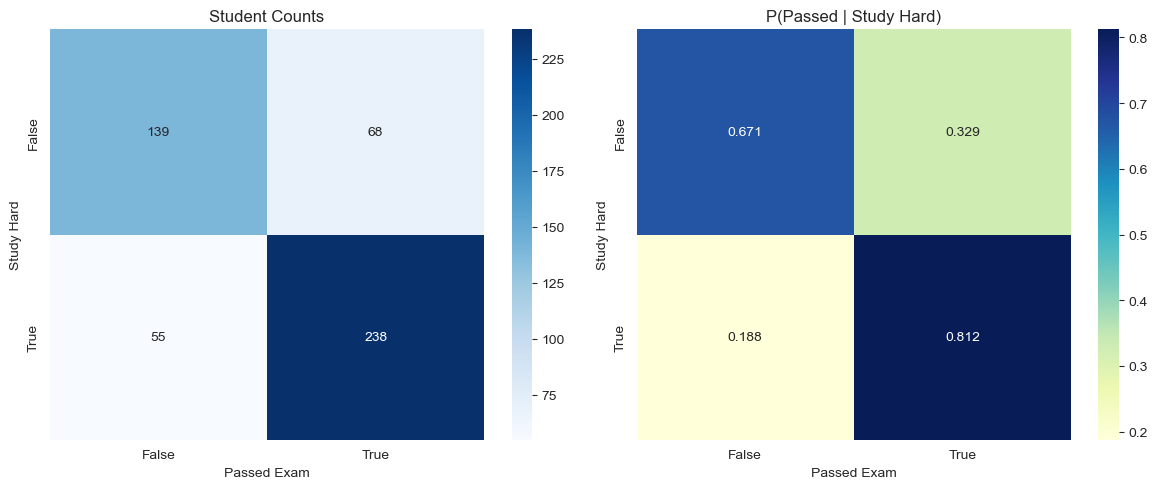

In [9]:
# Visualize the data
plt.figure(figsize=(12, 5))

# Plot the counts
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Student Counts')

# Plot the conditional probabilities
plt.subplot(1, 2, 2)
sns.heatmap(conditional_table, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('P(Passed | Study Hard)')

plt.tight_layout()
plt.show()

# Calculate specific conditional probabilities
p_pass_given_studyHard_empirical = contingency_table.loc[True, True] / contingency_table.loc[True].sum()
p_pass_given_notStudyHard_empirical = contingency_table.loc[False, True] / contingency_table.loc[False].sum()
p_studyHard_given_pass = contingency_table.loc[True, True] / contingency_table[True].sum()

In [10]:
print(f"P(Pass | Studied Hard) = {p_pass_given_studyHard_empirical:.3f}")
print(f"P(Pass | Did Not Study Hard) = {p_pass_given_notStudyHard_empirical:.3f}")
print(f"P(Studied Hard | Passed) = {p_studyHard_given_pass:.3f}")

P(Pass | Studied Hard) = 0.812
P(Pass | Did Not Study Hard) = 0.329
P(Studied Hard | Passed) = 0.778



> 💡 **Key Insight**: Notice that P(Pass | Studied Hard) and P(Studied Hard | Passed) are different values. The order in conditional probability matters!

### Independence and Conditional Probability

If events A and B are independent, then the occurrence of one doesn't affect the probability of the other:

$$P(A|B) = P(A)$$

Let's test if "having breakfast" and "passing an exam" are independent in a hypothetical dataset:



In [11]:
# Create another hypothetical dataset
np.random.seed(42)
n_students = 500

# Generate data for breakfast and exam
had_breakfast = np.random.choice([True, False], size=n_students, p=[0.7, 0.3])
# For independence, the probability of passing should be the same regardless of breakfast
passed_exam_indep = np.random.choice([True, False], size=n_students, p=[0.6, 0.4])

# Create a contingency table
indep_df = pd.DataFrame({
    'Had Breakfast': had_breakfast,
    'Passed Exam': passed_exam_indep
})

# Create a cross-tab
indep_table = pd.crosstab(indep_df['Had Breakfast'], indep_df['Passed Exam'])
print("Independence Example - Contingency Table:")
print(indep_table)

# Calculate conditional probabilities
indep_cond_table = indep_table.div(indep_table.sum(axis=1), axis=0)
print("\nConditional Probability Table (P(Passed | Had Breakfast)):")
print(indep_cond_table)

Independence Example - Contingency Table:
Passed Exam    False  True 
Had Breakfast              
False             53    101
True             127    219

Conditional Probability Table (P(Passed | Had Breakfast)):
Passed Exam       False     True 
Had Breakfast                    
False          0.344156  0.655844
True           0.367052  0.632948


In [12]:
# Calculate the overall probability of passing
overall_pass_rate = indep_df['Passed Exam'].mean()
print(f"\nOverall probability of passing: {overall_pass_rate:.3f}")
print(f"P(Pass | Had Breakfast): {indep_cond_table.loc[True, True]:.3f}")
print(f"P(Pass | No Breakfast): {indep_cond_table.loc[False, True]:.3f}")


Overall probability of passing: 0.640
P(Pass | Had Breakfast): 0.633
P(Pass | No Breakfast): 0.656


In [13]:
# Perform a chi-square test of independence
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(indep_table)
print(f"\nChi-square test of independence:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Are breakfast and exam results independent? {'Yes' if p > 0.05 else 'No'}")


Chi-square test of independence:
Chi-square statistic: 0.1533
p-value: 0.6954
Are breakfast and exam results independent? Yes



### Application: Filtering Spam Emails

Let's see how conditional probability can be used in a practical application: spam filtering.



In [14]:
# Create a simple dataset of emails with features and classification
np.random.seed(42)
n_emails = 1000

# Features that might indicate spam
has_urgent = np.random.choice([True, False], size=n_emails, p=[0.3, 0.7])  # "URGENT" in subject
has_money = np.random.choice([True, False], size=n_emails, p=[0.2, 0.8])   # Mentions money
has_link = np.random.choice([True, False], size=n_emails, p=[0.4, 0.6])    # Contains a link

# Generate is_spam with conditional probabilities
is_spam = np.zeros(n_emails, dtype=bool)

for i in range(n_emails):
    # Probability of spam based on features
    spam_prob = 0.1  # Base rate
    
    if has_urgent[i]:
        spam_prob += 0.3
    if has_money[i]:
        spam_prob += 0.3
    if has_link[i]:
        spam_prob += 0.1
        
    # Cap at 0.9 to avoid certainty
    spam_prob = min(spam_prob, 0.9)
    
    # Determine if spam
    is_spam[i] = np.random.choice([True, False], p=[spam_prob, 1-spam_prob])

# Create a DataFrame
email_df = pd.DataFrame({
    'Has Urgent': has_urgent,
    'Has Money': has_money,
    'Has Link': has_link,
    'Is Spam': is_spam
})

# Calculate overall spam rate
overall_spam_rate = email_df['Is Spam'].mean()
print(f"Overall spam rate: {overall_spam_rate:.3f}")

# Calculate conditional probabilities for each feature
feature_columns = ['Has Urgent', 'Has Money', 'Has Link']
for feature in feature_columns:
    spam_given_feature = email_df[email_df[feature]]['Is Spam'].mean()
    spam_given_no_feature = email_df[~email_df[feature]]['Is Spam'].mean()
    
    print(f"P(Spam | {feature}) = {spam_given_feature:.3f}")
    print(f"P(Spam | Not {feature}) = {spam_given_no_feature:.3f}")
    print(f"Likelihood ratio: {spam_given_feature / spam_given_no_feature:.2f}x\n")

Overall spam rate: 0.297
P(Spam | Has Urgent) = 0.505
P(Spam | Not Has Urgent) = 0.200
Likelihood ratio: 2.53x

P(Spam | Has Money) = 0.552
P(Spam | Not Has Money) = 0.232
Likelihood ratio: 2.38x

P(Spam | Has Link) = 0.342
P(Spam | Not Has Link) = 0.267
Likelihood ratio: 1.28x



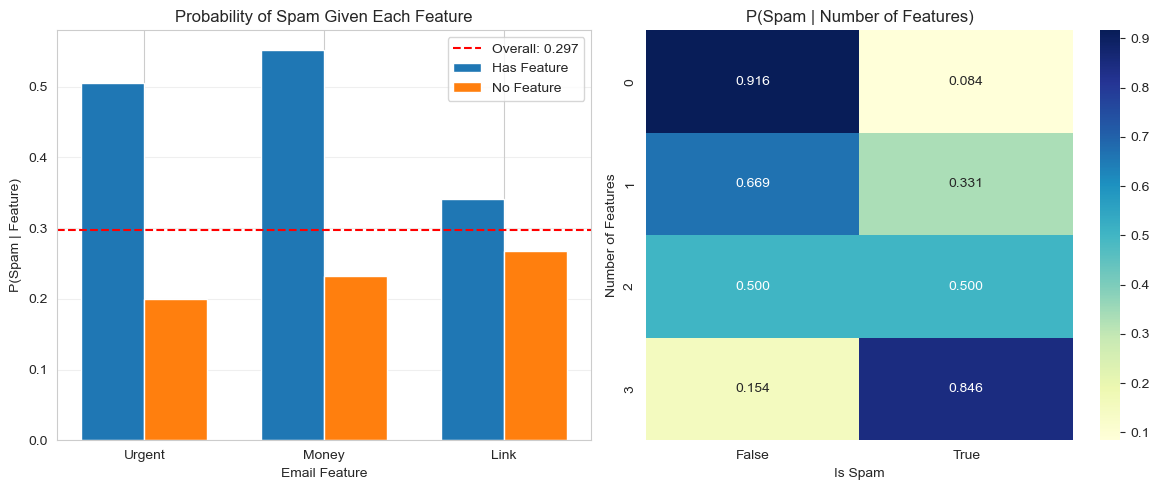

In [15]:
# Visualize the relationship between features and spam
plt.figure(figsize=(12, 5))

# Plot the conditional probabilities
plt.subplot(1, 2, 1)
feature_names = ['Urgent', 'Money', 'Link']
positive_probs = [email_df[email_df[col]]['Is Spam'].mean() for col in feature_columns]
negative_probs = [email_df[~email_df[col]]['Is Spam'].mean() for col in feature_columns]

x = np.arange(len(feature_names))
width = 0.35

plt.bar(x - width/2, positive_probs, width, label='Has Feature')
plt.bar(x + width/2, negative_probs, width, label='No Feature')
plt.axhline(y=overall_spam_rate, color='r', linestyle='--', label=f'Overall: {overall_spam_rate:.3f}')

plt.xlabel('Email Feature')
plt.ylabel('P(Spam | Feature)')
plt.title('Probability of Spam Given Each Feature')
plt.xticks(x, feature_names)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Create a mosaic plot (modified heatmap) to show feature combinations
plt.subplot(1, 2, 2)
# Count spam emails with combinations of features
email_df['Feature Count'] = email_df[feature_columns].sum(axis=1)
feature_count_spam = pd.crosstab(email_df['Feature Count'], email_df['Is Spam'], normalize='index')

sns.heatmap(feature_count_spam, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('P(Spam | Number of Features)')
plt.xlabel('Is Spam')
plt.ylabel('Number of Features')

plt.tight_layout()
plt.show()

## 2. Bayes' Theorem

### Updating Beliefs with Evidence

Bayes' theorem is a powerful tool that allows us to update our beliefs as we gather new evidence. It's like being a detective who revises their theory with each new clue.

Let's start with a simple example everyone can understand: the probability that it will rain given that it's cloudy.

### The Colored Balls Example

Before diving into the formal theorem, let's understand the intuition with a simple example:

We have two bags of colored balls:
- Bag A: 7 red balls and 3 blue balls
- Bag B: 2 red balls and 8 blue balls

If we pick a bag at random and then draw a ball, what's the probability the ball came from Bag A if it's red?

In [16]:
# Define our bags
bag_A = {'red': 7, 'blue': 3}
bag_B = {'red': 2, 'blue': 8}

# Prior probabilities of choosing each bag
p_bag_A = 0.5
p_bag_B = 0.5

# Probability of drawing a red ball from each bag
p_red_given_A = bag_A['red'] / sum(bag_A.values())
p_red_given_B = bag_B['red'] / sum(bag_B.values())

# Calculate P(Red) using the law of total probability
p_red = p_red_given_A * p_bag_A + p_red_given_B * p_bag_B

# Use Bayes' theorem to calculate P(Bag A | Red)
p_A_given_red = (p_red_given_A * p_bag_A) / p_red

# Print the results
print("Colored Balls Example:")
print(f"P(Red | Bag A) = {p_red_given_A:.3f}")
print(f"P(Red | Bag B) = {p_red_given_B:.3f}")
print(f"P(Red) = {p_red:.3f}")
print(f"P(Bag A | Red) = {p_A_given_red:.3f}")

Colored Balls Example:
P(Red | Bag A) = 0.700
P(Red | Bag B) = 0.200
P(Red) = 0.450
P(Bag A | Red) = 0.778


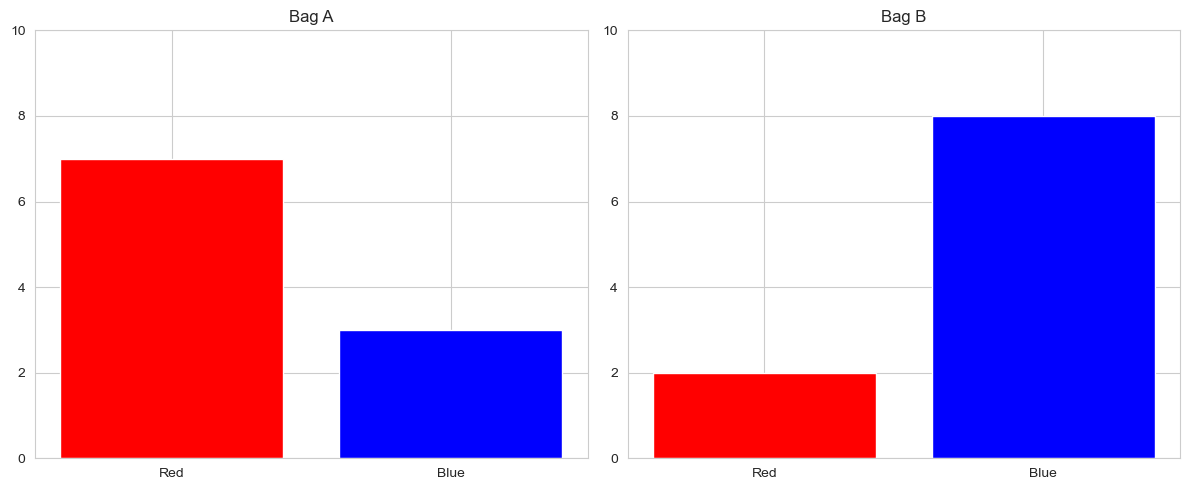

In [17]:
# Visualize the bags and their contents
plt.figure(figsize=(12, 5))

# Bag A
plt.subplot(1, 2, 1)
plt.bar(['Red', 'Blue'], [bag_A['red'], bag_A['blue']], color=['red', 'blue'])
plt.title('Bag A')
plt.ylim(0, 10)

# Bag B
plt.subplot(1, 2, 2)
plt.bar(['Red', 'Blue'], [bag_B['red'], bag_B['blue']], color=['red', 'blue'])
plt.title('Bag B')
plt.ylim(0, 10)

plt.tight_layout()
plt.show()


### Bayes' Theorem Formula

Bayes' theorem allows us to calculate the probability of a hypothesis given the evidence:

$$P(H|E) = \frac{P(E|H) \times P(H)}{P(E)}$$

Where:
- P(H|E) is the posterior probability of the hypothesis given the evidence
- P(E|H) is the likelihood of the evidence given the hypothesis
- P(H) is the prior probability of the hypothesis
- P(E) is the marginal likelihood or evidence

In our bags example:
- H = "The ball came from Bag A" (our hypothesis)
- E = "The ball is red" (our evidence)
- P(H) = 0.5 (prior probability of choosing Bag A)
- P(E|H) = 0.7 (likelihood of getting a red ball from Bag A)
- P(E) = 0.45 (overall probability of drawing a red ball)

### The Medical Test Example

One of the most illustrative applications of Bayes' theorem is in medical testing. Let's examine a scenario:

- A disease affects 1% of the population
- A test for the disease has 95% sensitivity (true positive rate)
- The test has 90% specificity (true negative rate)

If a person tests positive, what's the probability they actually have the disease?



In [18]:
# Define the probabilities
p_disease = 0.01  # Prior probability of having the disease
p_positive_given_disease = 0.95  # Sensitivity
p_negative_given_no_disease = 0.90  # Specificity
p_positive_given_no_disease = 1 - p_negative_given_no_disease  # False positive rate

# Calculate the marginal likelihood P(Positive)
p_positive = (p_positive_given_disease * p_disease) + (p_positive_given_no_disease * (1 - p_disease))

# Apply Bayes' theorem
p_disease_given_positive = (p_positive_given_disease * p_disease) / p_positive

# Print the results
print("\nMedical Test Example:")
print(f"Prior probability of disease: {p_disease:.4f} (1%)")
print(f"Probability of positive test given disease (Sensitivity): {p_positive_given_disease:.4f}")
print(f"Probability of negative test given no disease (Specificity): {p_negative_given_no_disease:.4f}")
print(f"Probability of a positive test result: {p_positive:.4f}")
print(f"Posterior probability of disease given positive test: {p_disease_given_positive:.4f}")
print(f"This means only about {p_disease_given_positive*100:.1f}% of people who test positive actually have the disease!")


Medical Test Example:
Prior probability of disease: 0.0100 (1%)
Probability of positive test given disease (Sensitivity): 0.9500
Probability of negative test given no disease (Specificity): 0.9000
Probability of a positive test result: 0.1085
Posterior probability of disease given positive test: 0.0876
This means only about 8.8% of people who test positive actually have the disease!


In [19]:
# Visualize using a frequency table approach (assume 1000 people)
population = 1000
with_disease = population * p_disease
without_disease = population - with_disease

# Test results
true_positives = with_disease * p_positive_given_disease
false_negatives = with_disease - true_positives
false_positives = without_disease * p_positive_given_no_disease
true_negatives = without_disease - false_positives

# Create a DataFrame to visualize
import pandas as pd
data = {
    'Disease Status': ['Disease'] * int(with_disease) + ['No Disease'] * int(without_disease),
    'Test Result': ['Positive'] * int(true_positives) + ['Negative'] * int(false_negatives) +
                  ['Positive'] * int(false_positives) + ['Negative'] * int(true_negatives)
}
df = pd.DataFrame(data)

# Visualize the results
plt.figure(figsize=(12, 5))

# Plot counts by disease status
plt.subplot(1, 2, 1)
sns.countplot(x='Disease Status', hue='Test Result', data=df)
plt.title('Test Results by Disease Status')
plt.ylabel('Count')

# Plot another visualization showing why the result is counterintuitive
plt.subplot(1, 2, 2)
groups = ['True Positives', 'False Positives']
values = [true_positives, false_positives]

plt.bar(groups, values, color=['green', 'red'])
plt.title('Why Most Positive Tests are False Positives')
plt.ylabel('Count')
for i, v in enumerate(values):
    plt.text(i, v + 1, f'{int(v)}', ha='center')

plt.tight_layout()
plt.show()

ValueError: All arrays must be of the same length


> 🤔 **Think About It**: Why is the probability of having the disease given a positive test so low, even though the test is 95% accurate? This is the **base rate fallacy** - when the disease is rare, most positive tests are false positives!

### Bayesian Updating: Sequential Evidence

One powerful aspect of Bayes' theorem is that it allows us to update our beliefs sequentially as new evidence comes in. The posterior from one calculation becomes the prior for the next.

Let's see this in action with a simple example:



In [21]:
# Bayesian updating with sequential evidence
# Scenario: We're trying to determine if a coin is fair or biased
# The biased coin has P(Heads) = 0.7

# Prior probabilities
p_fair = 0.5  # 50% chance the coin is fair
p_biased = 0.5  # 50% chance the coin is biased

# Likelihoods
p_heads_given_fair = 0.5
p_heads_given_biased = 0.7

# Let's flip the coin 5 times and observe: H, H, T, H, H
flips = ['H', 'H', 'T', 'H', 'H']

# Track our belief updates
probabilities = []
probabilities.append({'fair': p_fair, 'biased': p_biased})

for i, flip in enumerate(flips):
    # Calculate the likelihood of this flip
    if flip == 'H':
        p_flip_given_fair = p_heads_given_fair
        p_flip_given_biased = p_heads_given_biased
    else:  # flip == 'T'
        p_flip_given_fair = 1 - p_heads_given_fair
        p_flip_given_biased = 1 - p_heads_given_biased
    
    # Calculate the marginal likelihood
    p_flip = (p_flip_given_fair * p_fair) + (p_flip_given_biased * p_biased)
    
    # Update our beliefs using Bayes' theorem
    p_fair = (p_flip_given_fair * p_fair) / p_flip
    p_biased = (p_flip_given_biased * p_biased) / p_flip
    
    # Store the updated probabilities
    probabilities.append({'fair': p_fair, 'biased': p_biased})
    
    print(f"After flip {i+1} ({flip}): P(Fair) = {p_fair:.4f}, P(Biased) = {p_biased:.4f}")

After flip 1 (H): P(Fair) = 0.4167, P(Biased) = 0.5833
After flip 2 (H): P(Fair) = 0.3378, P(Biased) = 0.6622
After flip 3 (T): P(Fair) = 0.4596, P(Biased) = 0.5404
After flip 4 (H): P(Fair) = 0.3779, P(Biased) = 0.6221
After flip 5 (H): P(Fair) = 0.3026, P(Biased) = 0.6974


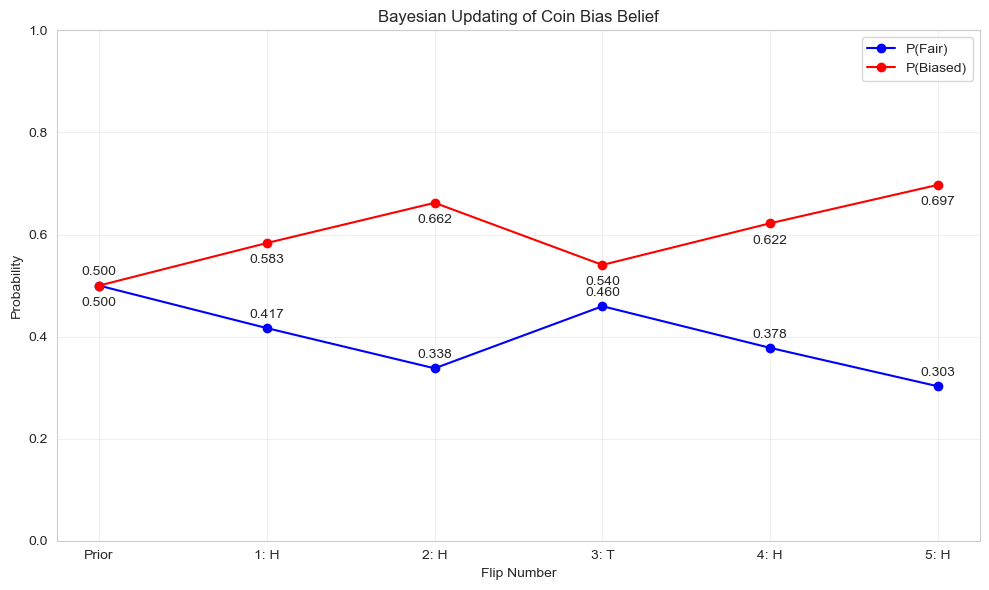

In [22]:
# Visualize the updating process
plt.figure(figsize=(10, 6))
flips_labels = ['Prior'] + [f'{i+1}: {flip}' for i, flip in enumerate(flips)]
fair_probs = [p['fair'] for p in probabilities]
biased_probs = [p['biased'] for p in probabilities]

plt.plot(flips_labels, fair_probs, 'bo-', label='P(Fair)')
plt.plot(flips_labels, biased_probs, 'ro-', label='P(Biased)')
plt.xlabel('Flip Number')
plt.ylabel('Probability')
plt.title('Bayesian Updating of Coin Bias Belief')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend()

# Add text annotations
for i, (fair, biased) in enumerate(zip(fair_probs, biased_probs)):
    plt.text(i, fair + 0.02, f'{fair:.3f}', ha='center')
    plt.text(i, biased - 0.04, f'{biased:.3f}', ha='center')

plt.tight_layout()
plt.show()


> 💡 **Key Insight**: With each new piece of evidence, our belief in the hypothesis evolves. This is the essence of Bayesian reasoning - we're always updating our beliefs based on new data.

### Applications of Bayes' Theorem in Machine Learning

Bayes' theorem is foundational to many machine learning algorithms and approaches. Let's look at a simple application: spam email classification.



In [23]:
# Let's create a simple Bayesian spam classifier
# We'll use word frequencies as features

# Define our training data
emails = [
    {'content': 'buy discount viagra now', 'label': 'spam'},
    {'content': 'meeting scheduled for tomorrow', 'label': 'ham'},
    {'content': 'free lottery win notification', 'label': 'spam'},
    {'content': 'project report due next week', 'label': 'ham'},
    {'content': 'urgent business proposal million dollars', 'label': 'spam'},
    {'content': 'lunch at the cafe today', 'label': 'ham'},
    {'content': 'free gift card click now', 'label': 'spam'},
    {'content': 'quarterly results look good', 'label': 'ham'},
    {'content': 'win free vacation now', 'label': 'spam'},
    {'content': 'team meeting at three pm', 'label': 'ham'}
]

# Extract all unique words from our corpus
import re
import string

def clean_text(text):
    # Convert to lowercase and remove punctuation
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    return text

# Get all unique words
all_words = set()
for email in emails:
    words = clean_text(email['content']).split()
    all_words.update(words)

# Calculate prior probabilities
spam_count = sum(1 for email in emails if email['label'] == 'spam')
ham_count = len(emails) - spam_count

p_spam = spam_count / len(emails)
p_ham = ham_count / len(emails)

print("\nBayesian Spam Filter:")
print(f"Prior P(Spam) = {p_spam:.2f}")
print(f"Prior P(Ham) = {p_ham:.2f}")


Bayesian Spam Filter:
Prior P(Spam) = 0.50
Prior P(Ham) = 0.50


In [25]:
# Calculate word frequencies in spam and ham
word_counts = {'spam': {}, 'ham': {}}

for email in emails:
    words = clean_text(email['content']).split()
    for word in set(words):  # Use set to count each word once per email
        if word in word_counts[email['label']]:
            word_counts[email['label']][word] += 1
        else:
            word_counts[email['label']][word] = 1

# Calculate likelihood P(Word | Class) with Laplace smoothing
def get_likelihood(word, email_class):
    # Laplace smoothing (add 1 to avoid zero probabilities)
    word_count = word_counts[email_class].get(word, 0) + 1
    total_words = sum(word_counts[email_class].values()) + len(all_words)
    return word_count / total_words

# Calculate probabilities for some interesting words
interesting_words = ['free', 'meeting', 'win', 'project', 'urgent']

print("\nWord Likelihoods:")
for word in interesting_words:
    p_word_given_spam = get_likelihood(word, 'spam')
    p_word_given_ham = get_likelihood(word, 'ham')
    ratio = p_word_given_spam / p_word_given_ham
    
    print(f"P('{word}' | Spam) = {p_word_given_spam:.4f}")
    print(f"P('{word}' | Ham) = {p_word_given_ham:.4f}")
    print(f"Likelihood ratio: {ratio:.2f}x\n")

# Classify a new email using naive Bayes
def classify_email(content):
    words = clean_text(content).split()
    
    # Calculate log probabilities to avoid underflow
    log_p_spam = np.log(p_spam)
    log_p_ham = np.log(p_ham)
    
    for word in words:
        log_p_spam += np.log(get_likelihood(word, 'spam'))
        log_p_ham += np.log(get_likelihood(word, 'ham'))
    
    # Convert back from log space
    p_spam_given_email = np.exp(log_p_spam)
    p_ham_given_email = np.exp(log_p_ham)
    
    # Normalize
    total = p_spam_given_email + p_ham_given_email
    p_spam_given_email /= total
    p_ham_given_email /= total
    
    return {
        'spam_probability': p_spam_given_email,
        'ham_probability': p_ham_given_email,
        'classification': 'spam' if p_spam_given_email > p_ham_given_email else 'ham'
    }

# Test the classifier on some examples
test_emails = [
    'free gift for you',
    'meeting with the team',
    'urgent free business opportunity',
    'project schedule update'
]

print("Testing our classifier:")
for email in test_emails:
    result = classify_email(email)
    print(f"Email: '{email}'")
    print(f"P(Spam | Email) = {result['spam_probability']:.4f}")
    print(f"P(Ham | Email) = {result['ham_probability']:.4f}")
    print(f"Classification: {result['classification']}\n")


Word Likelihoods:
P('free' | Spam) = 0.0667
P('free' | Ham) = 0.0164
Likelihood ratio: 4.07x

P('meeting' | Spam) = 0.0167
P('meeting' | Ham) = 0.0492
Likelihood ratio: 0.34x

P('win' | Spam) = 0.0500
P('win' | Ham) = 0.0164
Likelihood ratio: 3.05x

P('project' | Spam) = 0.0167
P('project' | Ham) = 0.0328
Likelihood ratio: 0.51x

P('urgent' | Spam) = 0.0333
P('urgent' | Ham) = 0.0164
Likelihood ratio: 2.03x

Testing our classifier:
Email: 'free gift for you'
P(Spam | Email) = 0.8104
P(Ham | Email) = 0.1896
Classification: spam

Email: 'meeting with the team'
P(Spam | Email) = 0.0818
P(Ham | Email) = 0.9182
Classification: ham

Email: 'urgent free business opportunity'
P(Spam | Email) = 0.9447
P(Ham | Email) = 0.0553
Classification: spam

Email: 'project schedule update'
P(Spam | Email) = 0.3444
P(Ham | Email) = 0.6556
Classification: ham



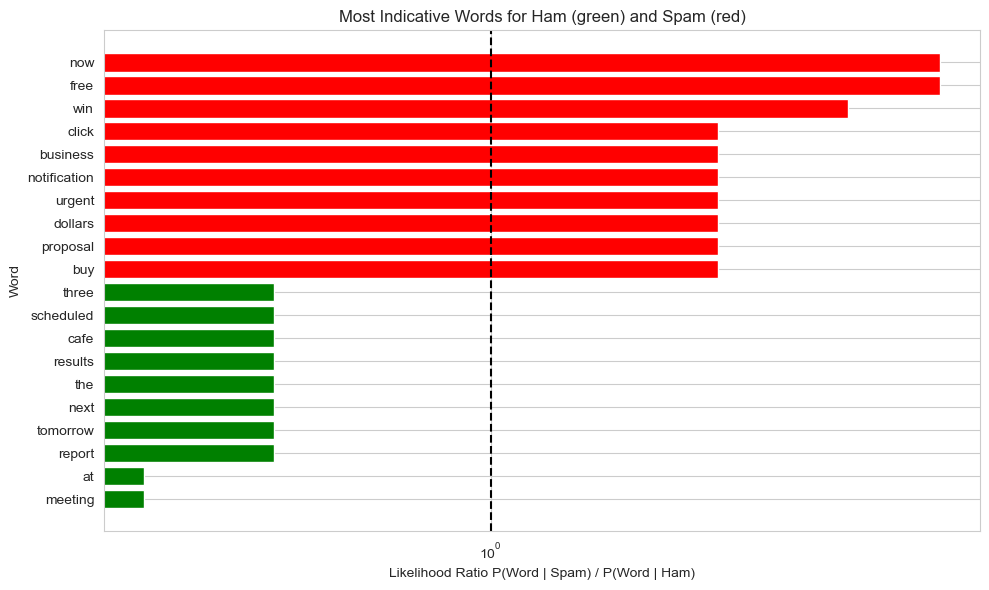

In [26]:
# Visualize the classifier's decision
plt.figure(figsize=(10, 6))

# Plot word likelihood ratios
word_ratios = {}
for word in all_words:
    ratio = get_likelihood(word, 'spam') / get_likelihood(word, 'ham')
    word_ratios[word] = ratio

# Sort and select top and bottom 10 words
sorted_words = sorted(word_ratios.items(), key=lambda x: x[1])
spam_indicative = sorted_words[-10:]  # Top 10 spam indicators
ham_indicative = sorted_words[:10]    # Top 10 ham indicators

# Combine into a single visualization
all_indicative = ham_indicative + spam_indicative
words = [word for word, ratio in all_indicative]
ratios = [ratio for word, ratio in all_indicative]
colors = ['green']*10 + ['red']*10

plt.barh(words, ratios, color=colors)
plt.axvline(x=1, color='black', linestyle='--')
plt.xlabel('Likelihood Ratio P(Word | Spam) / P(Word | Ham)')
plt.ylabel('Word')
plt.title('Most Indicative Words for Ham (green) and Spam (red)')
plt.xscale('log')  # Use log scale for better visualization
plt.tight_layout()
plt.show()


<details>
<summary>Advanced 📚: Naive Bayes Classifier</summary>

The spam filter we built above is a simple version of the Naive Bayes classifier. The "naive" part comes from the assumption that words in an email are conditionally independent given the class (spam or ham).

In practice, this assumption is often violated (words do tend to co-occur), but Naive Bayes still performs well for many text classification tasks.

The general formula for Naive Bayes classification is:

$P(Class|Features) = \frac{P(Features|Class) \times P(Class)}{P(Features)}$

And with the naive independence assumption:

$P(Features|Class) = \prod_{i=1}^{n} P(Feature_i|Class)$

This makes computation much simpler and is the basis for many spam filters, document classifiers, and other applications.



In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Prepare the data
email_texts = [email['content'] for email in emails]
email_labels = [email['label'] for email in emails]

# Create a pipeline with CountVectorizer and MultinomialNB
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

# Train the model
text_clf.fit(email_texts, email_labels)

# Test the classifier on our examples
print("\nScikit-learn Naive Bayes Classifier:")
for email in test_emails:
    # Get the predicted probabilities
    probs = text_clf.predict_proba([email])[0]
    predicted_class = text_clf.predict([email])[0]
    
    # The first probability is for 'ham', the second for 'spam'
    ham_prob = probs[list(text_clf.classes_).index('ham')]
    spam_prob = probs[list(text_clf.classes_).index('spam')]
    
    print(f"Email: '{email}'")
    print(f"P(Spam | Email) = {spam_prob:.4f}")
    print(f"P(Ham | Email) = {ham_prob:.4f}")
    print(f"Classification: {predicted_class}\n")



Scikit-learn Naive Bayes Classifier:
Email: 'free gift for you'
P(Spam | Email) = 0.8078
P(Ham | Email) = 0.1922
Classification: spam

Email: 'meeting with the team'
P(Spam | Email) = 0.0805
P(Ham | Email) = 0.9195
Classification: ham

Email: 'urgent free business opportunity'
P(Spam | Email) = 0.9439
P(Ham | Email) = 0.0561
Classification: spam

Email: 'project schedule update'
P(Spam | Email) = 0.3370
P(Ham | Email) = 0.6630
Classification: ham



The scikit-learn implementation is more sophisticated and includes features like:
- Better text vectorization
- Alpha smoothing parameters
- Handling of class imbalance
- Proper log-space computation to avoid numerical issues
</details>

## 3. Practice Exercises

### Exercise 1: Conditional Probability

In a particular city, 30% of the population uses public transportation, 20% uses bicycles, and 10% uses both. If a person is known to use public transportation, what is the probability they also use a bicycle?

In [ ]:
# Define the probabilities
p_public = 0.3  # Uses public transportation
p_bicycle = 0.2  # Uses bicycle
p_both = 0.1     # Uses both

# Calculate P(Bicycle | Public)
p_bicycle_given_public = p_both / p_public

print("Exercise 1 Solution:")
print(f"P(Bicycle | Public) = P(Both) / P(Public) = {p_both} / {p_public} = {p_bicycle_given_public:.3f}")

# Visualize with a Venn diagram
from matplotlib_venn import venn2

plt.figure(figsize=(8, 6))
v = venn2(subsets=(p_public - p_both, p_bicycle - p_both, p_both),
         set_labels=('Public Transport', 'Bicycle'))
plt.title('Transportation Usage in the City')
plt.show()

# Create a frequency table
public_and_bicycle = p_both
public_only = p_public - p_both
bicycle_only = p_bicycle - p_both
neither = 1 - (public_only + bicycle_only + public_and_bicycle)

data = {
    'Public': [True, True, False, False],
    'Bicycle': [True, False, True, False],
    'Probability': [public_and_bicycle, public_only, bicycle_only, neither]
}

transport_df = pd.DataFrame(data)
print("\nProbability Table:")
print(transport_df)



### Exercise 2: Medical Testing with Bayes' Theorem

A certain cancer affects 1 in 200 people. A test for this cancer has a sensitivity of 90% (true positive rate) and a specificity of 92% (true negative rate).

a) What is the probability a person has cancer given they tested positive?
b) What is the probability a person does not have cancer given they tested negative?
c) If a person tests positive on a first test, what is the probability they have cancer if they test positive on a second, independent test?



In [ ]:
# Define the probabilities
p_cancer = 1 / 200  # Prior probability of having cancer
p_positive_given_cancer = 0.90  # Sensitivity
p_negative_given_no_cancer = 0.92  # Specificity
p_positive_given_no_cancer = 1 - p_negative_given_no_cancer  # False positive rate
p_negative_given_cancer = 1 - p_positive_given_cancer  # False negative rate

# a) Calculate P(Cancer | Positive)
p_positive = (p_positive_given_cancer * p_cancer) + (p_positive_given_no_cancer * (1 - p_cancer))
p_cancer_given_positive = (p_positive_given_cancer * p_cancer) / p_positive

print("Exercise 2 Solution:")
print(f"a) P(Cancer | Positive) = {p_cancer_given_positive:.4f} ≈ {p_cancer_given_positive*100:.2f}%")

# b) Calculate P(No Cancer | Negative)
p_negative = (p_negative_given_cancer * p_cancer) + (p_negative_given_no_cancer * (1 - p_cancer))
p_no_cancer_given_negative = (p_negative_given_no_cancer * (1 - p_cancer)) / p_negative

print(f"b) P(No Cancer | Negative) = {p_no_cancer_given_negative:.4f} ≈ {p_no_cancer_given_negative*100:.2f}%")

# c) Calculate P(Cancer | Positive, Positive)
# After the first test, our new prior is P(Cancer | Positive)
p_cancer_after_first_test = p_cancer_given_positive

# Apply Bayes' theorem again with this new prior
p_positive_second = (p_positive_given_cancer * p_cancer_after_first_test) + \
                   (p_positive_given_no_cancer * (1 - p_cancer_after_first_test))
p_cancer_given_two_positives = (p_positive_given_cancer * p_cancer_after_first_test) / p_positive_second

print(f"c) P(Cancer | Two Positives) = {p_cancer_given_two_positives:.4f} ≈ {p_cancer_given_two_positives*100:.2f}%")

# Visualize the sequential testing
plt.figure(figsize=(10, 6))
labels = ['Prior', 'After 1st Test', 'After 2nd Test']
cancer_probs = [p_cancer, p_cancer_given_positive, p_cancer_given_two_positives]
no_cancer_probs = [1-p for p in cancer_probs]

width = 0.35
x = np.arange(len(labels))

plt.bar(x - width/2, cancer_probs, width, label='Cancer')
plt.bar(x + width/2, no_cancer_probs, width, label='No Cancer')

plt.xlabel('Testing Stage')
plt.ylabel('Probability')
plt.title('Bayesian Updating with Sequential Testing')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add text labels
for i, p in enumerate(cancer_probs):
    plt.text(i - width/2, p + 0.02, f'{p:.4f}', ha='center')
    plt.text(i + width/2, no_cancer_probs[i] + 0.02, f'{no_cancer_probs[i]:.4f}', ha='center')

plt.tight_layout()
plt.show()



### Exercise 3: Naive Bayes Classification

Using the concepts from the spam filter example, suppose we have movie reviews with these word frequencies:

- In positive reviews: "good" appears with 15% probability, "boring" with 2% probability
- In negative reviews: "good" appears with 3% probability, "boring" with 10% probability
- 60% of all reviews are positive, 40% are negative

What is the probability a review is positive if it contains both the words "good" and "boring"?



In [ ]:
# Define the probabilities
p_positive = 0.6  # Prior probability of a positive review
p_negative = 0.4  # Prior probability of a negative review

p_good_given_positive = 0.15  # Probability of "good" in positive reviews
p_boring_given_positive = 0.02  # Probability of "boring" in positive reviews

p_good_given_negative = 0.03  # Probability of "good" in negative reviews
p_boring_given_negative = 0.10  # Probability of "boring" in negative reviews

# Using Naive Bayes, calculate P(Positive | "good" and "boring")
# First, calculate the likelihoods assuming word independence
p_good_and_boring_given_positive = p_good_given_positive * p_boring_given_positive
p_good_and_boring_given_negative = p_good_given_negative * p_boring_given_negative

# Apply Bayes' theorem
numerator = p_good_and_boring_given_positive * p_positive
denominator = (p_good_and_boring_given_positive * p_positive) + (p_good_and_boring_given_negative * p_negative)
p_positive_given_good_and_boring = numerator / denominator

print("Exercise 3 Solution:")
print(f"P(Positive | 'good' and 'boring') = {p_positive_given_good_and_boring:.4f} ≈ {p_positive_given_good_and_boring*100:.1f}%")

# Visualize the calculation
plt.figure(figsize=(10, 6))

# Create a decision tree style visual
plt.figure(figsize=(12, 6))

def draw_branch(x, y, prob, label, color='blue'):
    plt.text(x, y, f"{label}: {prob:.3f}", fontsize=12, ha='center',
             bbox=dict(facecolor=color, alpha=0.1))

# Root
draw_branch(0.5, 0.9, 1.0, "All Reviews", 'gray')

# First level: positive vs negative
draw_branch(0.3, 0.7, p_positive, "Positive Reviews", 'green')
draw_branch(0.7, 0.7, p_negative, "Negative Reviews", 'red')

# Second level: word likelihoods
draw_branch(0.15, 0.5, p_good_given_positive, "'good' in Positive", 'green')
draw_branch(0.35, 0.5, p_boring_given_positive, "'boring' in Positive", 'green')
draw_branch(0.65, 0.5, p_good_given_negative, "'good' in Negative", 'red')
draw_branch(0.85, 0.5, p_boring_given_negative, "'boring' in Negative", 'red')

# Third level: combined likelihoods
draw_branch(0.25, 0.3, p_good_and_boring_given_positive, "Both words in Positive", 'green')
draw_branch(0.75, 0.3, p_good_and_boring_given_negative, "Both words in Negative", 'red')

# Fourth level: final result
draw_branch(0.5, 0.1, p_positive_given_good_and_boring, "P(Positive | 'good' and 'boring')", 'blue')

plt.axis('off')
plt.title('Naive Bayes Classification for Movie Review')
plt.tight_layout()
plt.show()


## 4. Mini-Quiz

Let's test your understanding with a quick quiz. Try to answer these questions before looking at the answers:

1. If P(A) = 0.3, P(B) = 0.4, and P(A ∩ B) = 0.2, what is P(A|B)?
2. A bag contains 8 red marbles and 4 blue marbles. If you draw 2 marbles without replacement, what is the probability that both are the same color?
3. If you test positive for a disease, but the prior probability of having the disease is very low, why might you want to get a second opinion or test?

<details>
<summary>Click here to see the answers</summary>

1. **P(A|B) calculation**:
   - P(A|B) = P(A ∩ B) / P(B) = 0.2 / 0.4 = 0.5 or 50%

2. **Drawing 2 marbles of the same color**:
   - P(both red) = (8/12) × (7/11) = 56/132
   - P(both blue) = (4/12) × (3/11) = 12/132
   - P(same color) = P(both red) + P(both blue) = 56/132 + 12/132 = 68/132 = 17/33 ≈ 0.515 or 51.5%

3. **Second opinion for disease test**:
   - When the prior probability of having a disease is very low, many positive test results are false positives (base rate fallacy).
   - Getting a second test significantly increases the posterior probability if both tests are positive, making the diagnosis more certain.
   - This is why doctors often run multiple tests for rare conditions.
</details>

## 5. Summary

In this notebook, we've covered:

- **Conditional Probability**: The probability of an event given that another event has occurred
  - Formula: P(A|B) = P(A ∩ B) / P(B)
  - Applications in understanding relationships between events

- **Bayes' Theorem**: A powerful tool for updating our beliefs based on new evidence
  - Formula: P(H|E) = P(E|H) × P(H) / P(E)
  - Components: prior, likelihood, evidence, and posterior

- **Applications**:
  - Medical testing and diagnosis
  - Spam filtering and text classification
  - Sequential updating of beliefs with multiple pieces of evidence

These concepts form the foundation for many machine learning algorithms and are essential for reasoning under uncertainty.

In the next notebook, we'll see how these probabilistic concepts connect directly to machine learning algorithms through examples like logistic regression and Naive Bayes classification.

## 6. Additional Resources

If you want to explore these concepts further, check out:

- [Seeing Theory - Bayesian Inference](https://seeing-theory.brown.edu/bayesian-inference/index.html) - Interactive visualizations
- [3Blue1Brown - Bayes Theorem](https://www.youtube.com/watch?v=HZGCoVF3YvM) - Excellent visual explanation
- [Think Bayes](http://www.greenteapress.com/thinkbayes/thinkbayes.pdf) - Free book on Bayesian statistics in Python